average_rewards Episode
0       -1057.402653
1       -1302.375408
2       -1567.140776
3       -1336.996939
4       -1297.681117
            ...     
40015    -540.658571
40016   -3606.536538
40017    -125.632163
40018     -39.440000
40019   -1057.565306
Name: Cumulative_Reward, Length: 420, dtype: float64


C:\Users\zmx5fy\AppData\Local\Temp\ipykernel_8056\2865052411.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_window_ids))


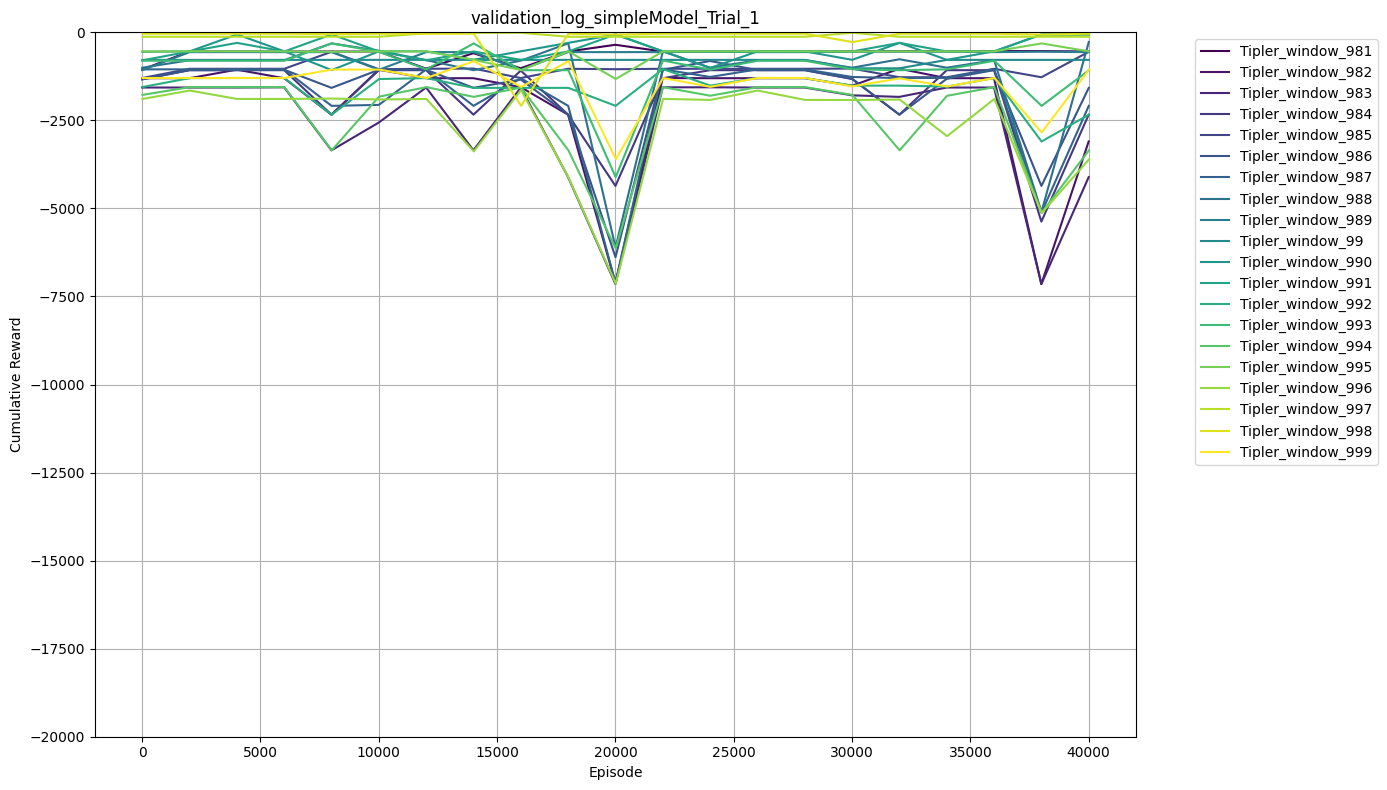

C:\Users\zmx5fy\AppData\Local\Temp\ipykernel_8056\2865052411.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_window_ids))


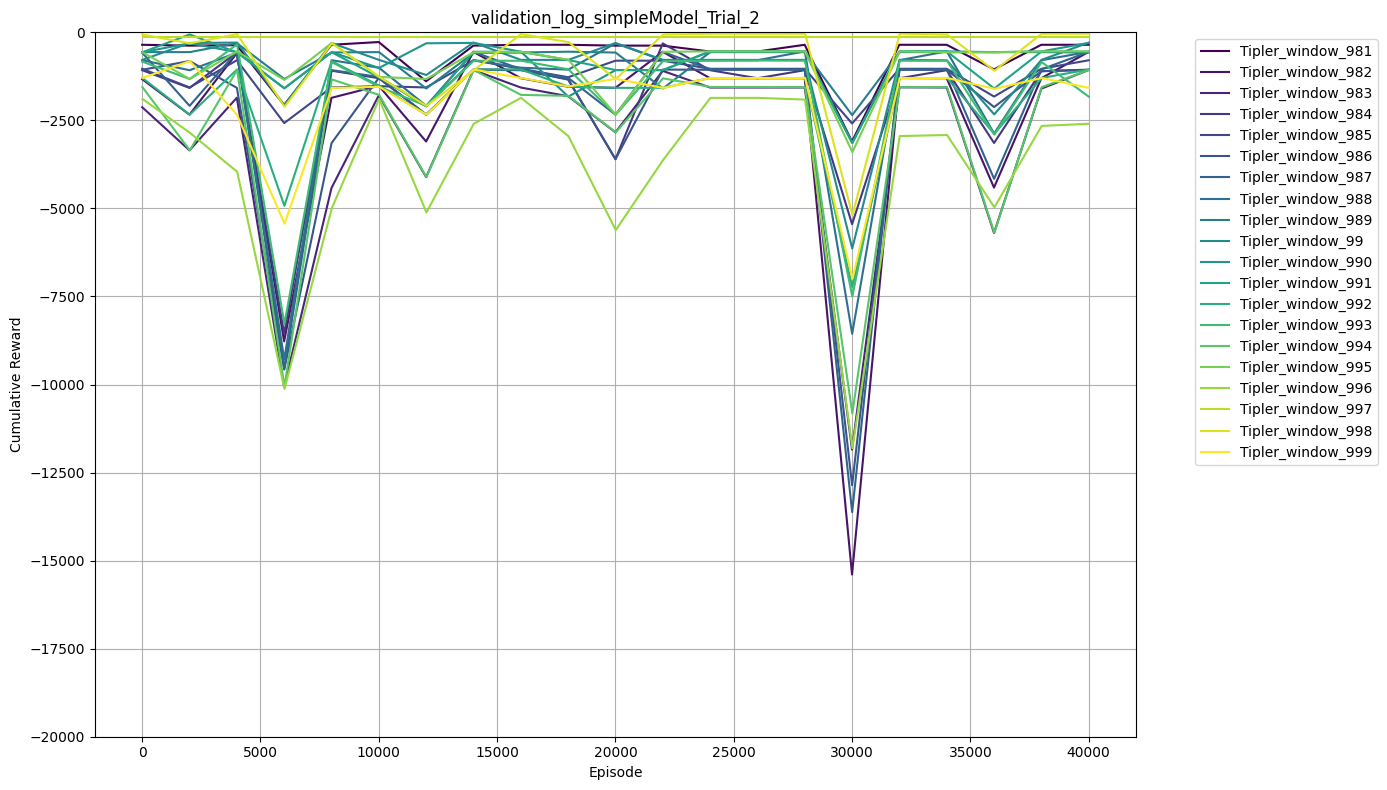

In [43]:
import re
import pandas as pd

# Load the data from the validation log file
file_path = 'validation_log_simpleModel_Trial_1.txt'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Regular expression pattern to extract data
pattern = r'Episode for Window ID: (\w+), .* Cumulative Reward: ([-\d.]+)'

# Lists to hold extracted data
episodes = []
window_ids = []
cumulative_rewards = []

# Track episode count
episode_count = 0

# Parse the file
for line in lines:
    if 'Validation for episodes' in line:
        # Find episode range and increment episode count accordingly
        episode_range = re.search(r'episodes (\d+) to (\d+)', line)
        if episode_range:
            episode_count = int(episode_range.group(1))
    else:
        # Extract window ID and cumulative reward
        match = re.search(pattern, line)
        if match:
            window_ids.append(match.group(1))
            cumulative_rewards.append(float(match.group(2)))
            episodes.append(episode_count)
            episode_count += 1

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    'Episode': episodes,
    'Window_ID': window_ids,
    'Cumulative_Reward': cumulative_rewards
})
average_rewards = df.groupby('Episode')['Cumulative_Reward'].mean()
# print (df)
print ("average_rewards", average_rewards)
import matplotlib.pyplot as plt

# Plotting the cumulative reward vs. episode for each window ID
plt.figure(figsize=(14, 8))

# Get a list of unique window IDs
unique_window_ids = df['Window_ID'].unique()

# Generate a color map for the plots
color_map = plt.cm.get_cmap('viridis', len(unique_window_ids))

for i, window_id in enumerate(unique_window_ids):
    # Filter data for the current window ID
    window_data = df[df['Window_ID'] == window_id]

    # Plot the data
    plt.plot(window_data['Episode'], window_data['Cumulative_Reward'], label=window_id, color=color_map(i))

# plt.plot(average_rewards.index, average_rewards.values, label='Average Cumulative Reward', color='black', linestyle='--')

plt.title('validation_log_simpleModel_Trial_1')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.ylim(-20000,0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

###############################################################################################################
# Load the data from the validation log file
file_path = 'validation_log_simpleModel_Trial_2.txt'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Regular expression pattern to extract data
pattern = r'Episode for Window ID: (\w+), .* Cumulative Reward: ([-\d.]+)'

# Lists to hold extracted data
episodes = []
window_ids = []
cumulative_rewards = []

# Track episode count
episode_count = 0

# Parse the file
for line in lines:
    if 'Validation for episodes' in line:
        # Find episode range and increment episode count accordingly
        episode_range = re.search(r'episodes (\d+) to (\d+)', line)
        if episode_range:
            episode_count = int(episode_range.group(1))
    else:
        # Extract window ID and cumulative reward
        match = re.search(pattern, line)
        if match:
            window_ids.append(match.group(1))
            cumulative_rewards.append(float(match.group(2)))
            episodes.append(episode_count)
            episode_count += 1

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    'Episode': episodes,
    'Window_ID': window_ids,
    'Cumulative_Reward': cumulative_rewards
})

import matplotlib.pyplot as plt

# Plotting the cumulative reward vs. episode for each window ID
plt.figure(figsize=(14, 8))

# Get a list of unique window IDs
unique_window_ids = df['Window_ID'].unique()

# Generate a color map for the plots
color_map = plt.cm.get_cmap('viridis', len(unique_window_ids))

for i, window_id in enumerate(unique_window_ids):
    # Filter data for the current window ID
    window_data = df[df['Window_ID'] == window_id]
    
    # Plot the data
    plt.plot(window_data['Episode'], window_data['Cumulative_Reward'], label=window_id, color=color_map(i))

plt.title('validation_log_simpleModel_Trial_2')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.ylim(-20000,0)
plt.tight_layout()
plt.show()


###############################################################################################################


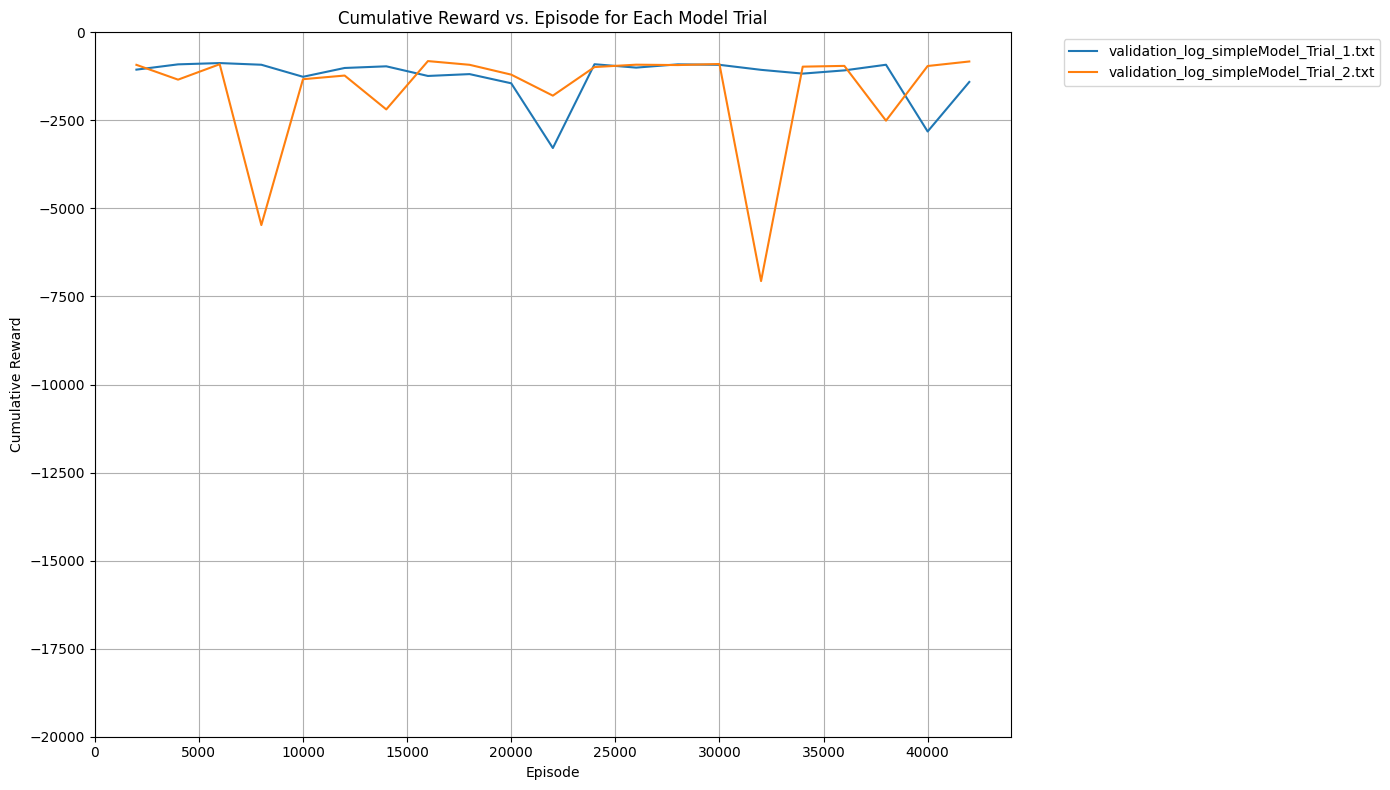

In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt

Model_list = {
    1: "validation_log_simpleModel_Trial_1.txt", 
    2: "validation_log_simpleModel_Trial_2.txt"
}

# Initialize the plot outside the loop
plt.figure(figsize=(14, 8))

for j in Model_list:    
    with open(Model_list[j], 'r') as file:
        lines = file.readlines()
    
    episode_pattern = r'Validation for episodes \d+ to (\d+)'
    reward_pattern = r'Cumulative Reward: ([-\d.]+)'
    
    average_rewards_data = []
    current_block_end_episode = None
    block_rewards = []
    
    for line in lines:
        episode_match = re.search(episode_pattern, line)
        if episode_match:
            if block_rewards:
                average_reward = sum(block_rewards) / len(block_rewards)
                average_rewards_data.append((current_block_end_episode, average_reward))
            
            current_block_end_episode = int(episode_match.group(1))
            block_rewards = []
        else:
            reward_match = re.search(reward_pattern, line)
            if reward_match:
                reward = float(reward_match.group(1))
                block_rewards.append(reward)
    
    if block_rewards:
        average_reward = sum(block_rewards) / len(block_rewards)
        average_rewards_data.append((current_block_end_episode, average_reward))
    
    df_average_rewards = pd.DataFrame(average_rewards_data, columns=['Ending_Episode', 'Average_Cumulative_Reward'])
    
    # Plot the data for this file
    plt.plot(df_average_rewards['Ending_Episode'], df_average_rewards['Average_Cumulative_Reward'], label=Model_list[j])
    
# Finalize the plot after the loop
plt.title('Cumulative Reward vs. Episode for Each Model Trial')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.ylim(-20000, 0)

plt.show()
